In [1]:
import temet
import h5py

In [2]:
print("Hello World")

Hello World


In [3]:
file_path = "/vera/u/jerbo/my_ptmp/L25n256_suite/gridpoint46/data.files/spectra/spectra_gridpoint46_z2.0_n100d2-fullbox_SDSS-BOSS_HI_combined.hdf5"

with h5py.File(file_path, "r") as f:
    # Zeigt alle Datasets im Root-Level
    print("Keys:", list(f.keys()))
    
    # Zugriff auf einzelne Datasets
    wave = f["wave"][:]   # Das [:] liest das gesamte Dataset in ein NumPy-Array ein
    flux = f["flux"][:]

Keys: ['EW_HI_1215', 'N_HI_1215', 'flux', 'ray_dir', 'ray_pos', 'ray_total_dl', 'tau_HI_1215', 'v90_HI_1215', 'wave']


In [4]:
Ly_alpha_0 = 1215.670
Ly_beta_0 = 1025.7223
z = 2

def redshift_wavelength_forward(z, wavelength):
    return (z+1)*wavelength

def redshift_wavelength_backward(z, wavelength):
    return wavelength/(z+1)

Ly_alpha_z = redshift_wavelength_forward(z, Ly_alpha_0)
Ly_beta_z = redshift_wavelength_forward(z, Ly_beta_0)

print(Ly_alpha_z)
print(Ly_beta_z)

3647.01
3077.1668999999997


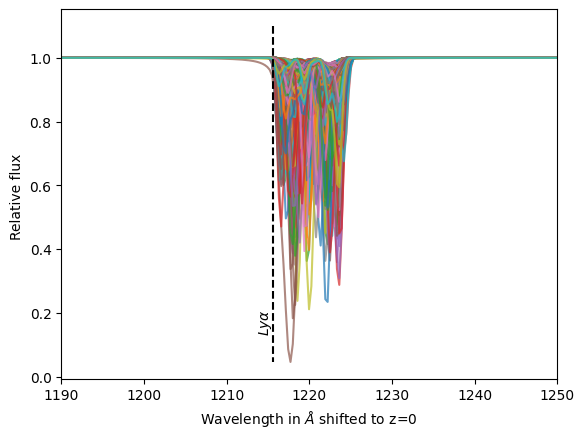

In [5]:
import matplotlib.pyplot as plt
n_spectra = 1000

min_value = 1
for i in range(n_spectra):
    if flux[i].min() < min_value:
        min_value = flux[i].min()

for i in range(n_spectra):
    plt.plot(redshift_wavelength_backward(2, wave), flux[i], alpha=0.7)

plt.plot([Ly_alpha_0, Ly_alpha_0], [1.1, min_value], c="black", linestyle="--", alpha=1)
plt.annotate(r"$Ly\alpha$", (Ly_alpha_0-2, min_value+0.1), rotation=90)
# plt.plot([Ly_beta_z, Ly_beta_z], [1.0, 0.5], c="blue")
plt.xlabel(r"Wavelength in $\AA$ shifted to z=0")
plt.ylabel(r"Relative flux ")
plt.xlim([1190, 1250])
plt.show()